Develop a machine learning model that can accurately predict the price of a car
based on various features and attributes. The model will take into account
factors such as the car's make, model, Year, Engine Fuel Type, Engine HP, Engine
Cylinders, and other relevant features.
By leveraging machine learning algorithms and historical car sales data, build a
predictive model that can provide accurate and reliable price estimates for used
cars.

In [61]:
#loading the necessary libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from google.colab import files
files.upload()

Saving data_car.csv to data_car (3).csv


{'data_car.csv': b'Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP\nBMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135\nBMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650\nBMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350\nBMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450\nBMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500\nBMW,1 Series,2012,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,

In [64]:
data=pd.read_csv('data_car.csv')

In [65]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [66]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#EDA on Dataset

In [67]:
data.shape

(11914, 16)

In [68]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [69]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [71]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [72]:
data['MSRP'].value_counts()

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: MSRP, Length: 6049, dtype: int64

In [73]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

**Missing Values checking**

In [74]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

**null values are present in the dataset in columns
1. Engine Fuel Type - 3      (object)
2. Engine HP        - 69     (float64)
3. Engine Cylinders - 30     (float64)
4. Number of Doors  - 6      (float64)
5. Market Category  - 3742   (object)**

In [75]:
data[data.isnull().any(axis=1)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
87,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,36,26,2009,2000
91,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
93,Nissan,200SX,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,35,25,2009,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,NaN,Compact,Coupe,23,16,640,2000
11809,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,39,30,2031,15950
11810,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,40,32,2031,17050
11867,GMC,Yukon,2015,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Large,4dr SUV,21,15,549,64520


**Missing values handling in dataset**

1. For numerical varible columns: imputation using mean or median(depending on distribution of the independent variable).
2. For categorical variable columns: imputation using mode.

**Checking the distribution of Engine HP, Engine Cylinders and Number of Doors**



Text(0.5, 0, 'Number of Doors')

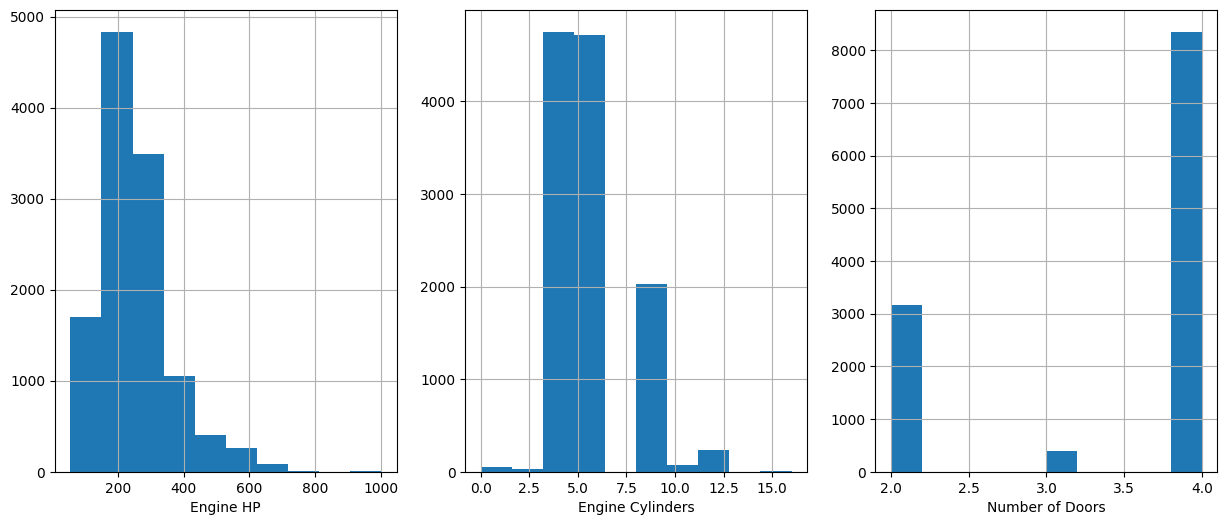

In [76]:
#Checking the distribution of Engine HP, Engine Cylinders and Number of Doors
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
data['Engine HP'].hist()
plt.xlabel('Engine HP')

plt.subplot(1,3,2)
data['Engine Cylinders'].hist()
plt.xlabel('Engine Cylinders')

plt.subplot(1,3,3)
data['Number of Doors'].hist()
plt.xlabel('Number of Doors')

In [77]:
#From the above plotted graphs we can infer that all the distributions are skewed so median can be used to fill the missing values

In [78]:
print(data['Engine HP'].mean())
print(data['Engine HP'].median())
print(data['Engine HP'].mode()[0])

249.38607007176023
227.0
200.0


In [79]:
print(data['Engine Cylinders'].mean())
print(data['Engine Cylinders'].median())
print(data['Engine Cylinders'].mode()[0])

5.628828677213059
6.0
4.0


In [80]:
print(data['Number of Doors'].mean())
print(data['Number of Doors'].median())
print(data['Number of Doors'].mode()[0])

3.4360933825999327
4.0
4.0


In [81]:
#filling missing values in numerical varible columns
d1=['Engine HP', 'Engine Cylinders', 'Number of Doors']
for i in d1:
  data[i]=data[i].fillna(data[i].median())

In [82]:
#filling missing values in categorical varible columns
d2=['Engine Fuel Type', 'Market Category']
for i in d2:
  data[i]=data[i].fillna(data[i].mode()[0])

In [83]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

**Outlier Checking using Boxplot**

In [84]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

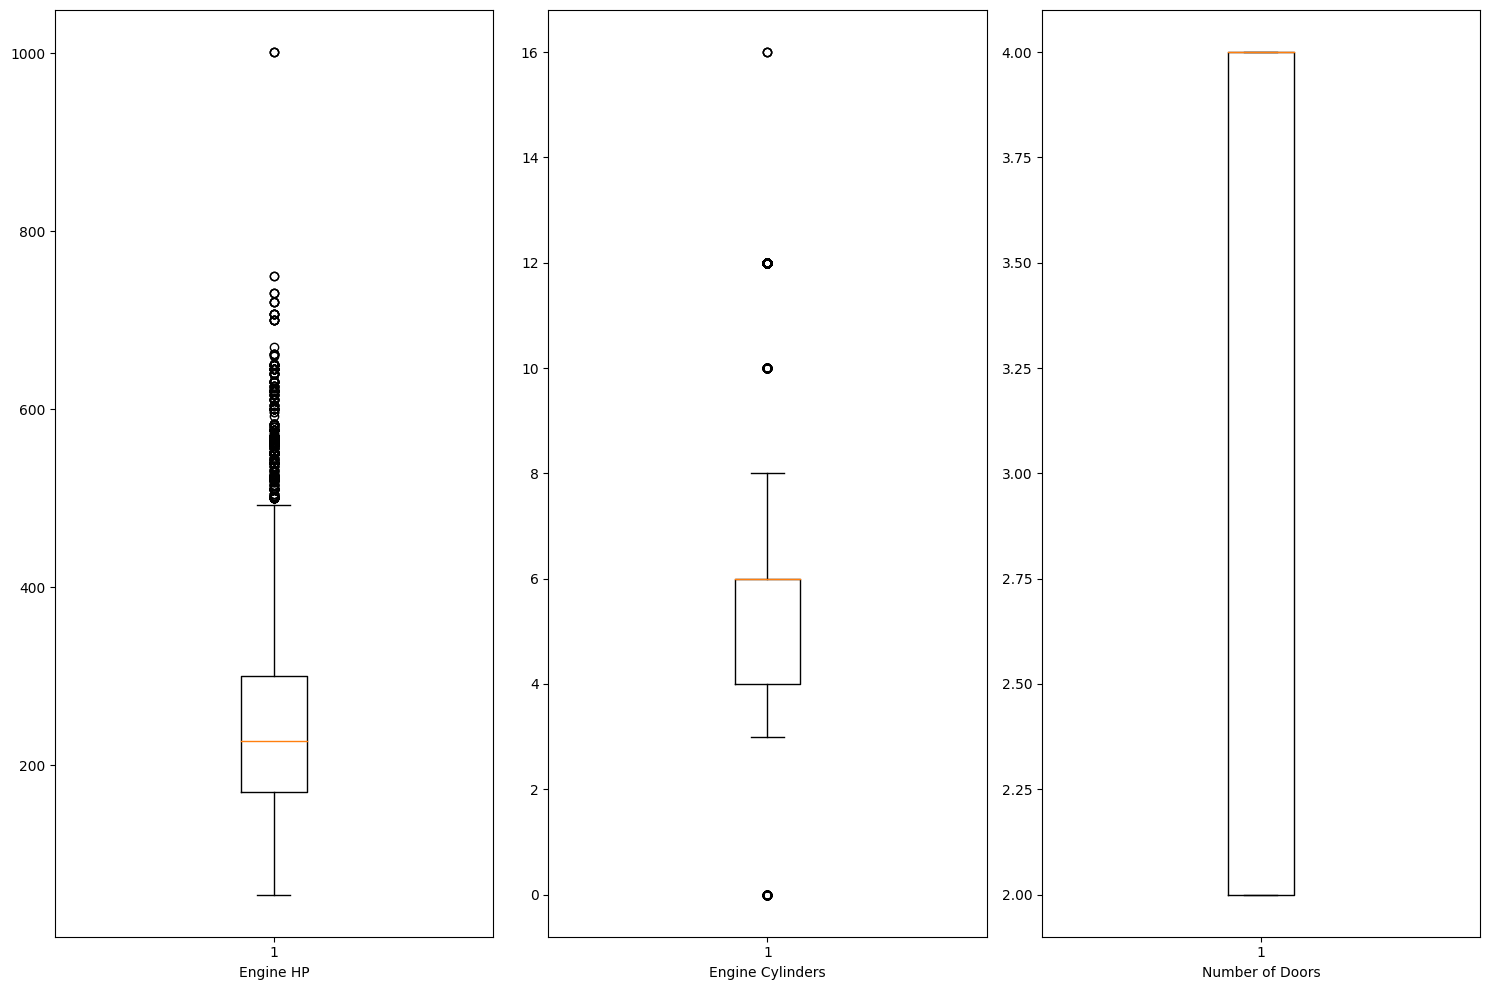

In [85]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.boxplot(data['Engine HP'])
plt.xlabel('Engine HP')

plt.subplot(1,3,2)
plt.boxplot(data['Engine Cylinders'])
plt.xlabel('Engine Cylinders')

plt.subplot(1,3,3)
plt.boxplot(data['Number of Doors'])
plt.xlabel('Number of Doors')

plt.tight_layout()

In [86]:
#There are outliers present in Engine HP and Engine Cylinders column

**checking for unique values**

In [87]:
data['Engine HP'].nunique()

356

In [88]:
data['Engine HP'].unique()

array([ 335.,  300.,  230.,  320.,  172.,  160.,  130.,  158.,  240.,
        248.,  162.,  217.,  184.,  295.,  115.,  140.,  155.,  114.,
        100.,  241.,  180.,  177.,  228.,  121.,  148.,  194.,  218.,
        161.,  292.,  250.,  255.,  222.,   82.,  134.,  306.,  400.,
        425.,  350.,  332.,  268.,  282.,  275.,  201.,  442.,  562.,
        597.,  237.,  270.,  445.,  443.,  302.,  322.,  315.,  227.,
        101.,  135.,  485.,  238.,  515.,  543.,  631.,  604.,  620.,
        611.,  661.,  157.,  402.,  389.,  110.,  532.,  170.,  165.,
        125.,  641.,  535.,  153.,  144.,  188.,  372.,  108.,  168.,
        190.,  205.,  200.,  173.,  220.,  210.,  280.,  207.,  265.,
        260.,  290.,  285.,  390.,  225.,  185.,  150.,  430.,  520.,
        560.,  475.,  500.,  540.,  370.,  580.,  420.,  345.,  195.,
        193.,  208.,  181.,  236.,  186.,  252.,  310.,  333.,  340.,
        450.,  281.,  288.,  138.,  137.,  106.,  271.,  196.,  212.,
        278.,  189.,

In [89]:
data['Engine Cylinders'].nunique()

9

In [90]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

In [91]:
data['Number of Doors'].nunique()

3

In [92]:
data['Number of Doors'].unique()

array([2., 4., 3.])

**1. Histogram**

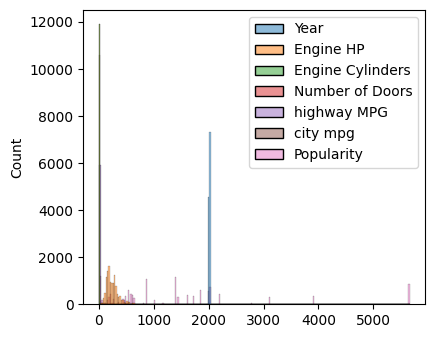

In [117]:
all_columns=[['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG','city mpg','Popularity']]

plt.figure(figsize=(15,13))
i=1

for column in all_columns:
        plt.subplot(3,3,i)
        sns.histplot(data[column])
        i+=1
        
plt.show()

**2. Scatter Plot between Year and Price**

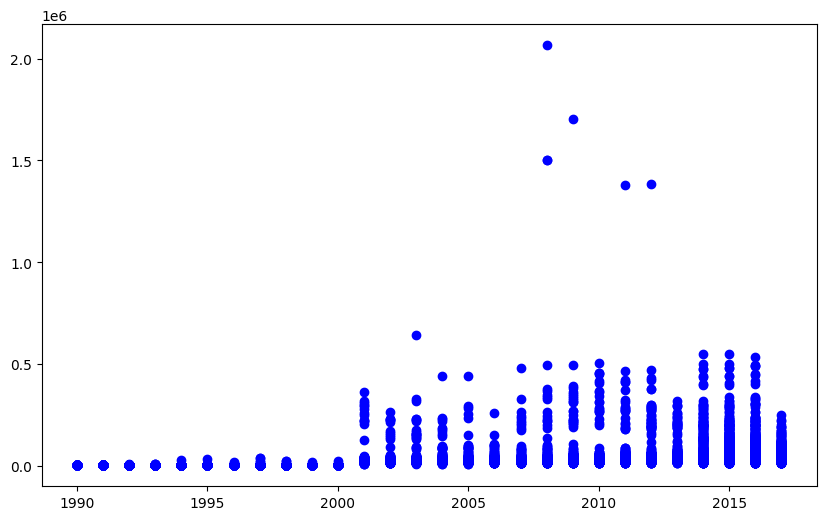

In [120]:
plt.figure(figsize =(10, 6))
plt.scatter(data['Year'], data['MSRP'], color ="blue");

**3. Checking for multicolinearity**

In [93]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [94]:
data=data[['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG','city mpg','Popularity','MSRP']]

In [95]:
corr_matrix=data.corr()

<Axes: >

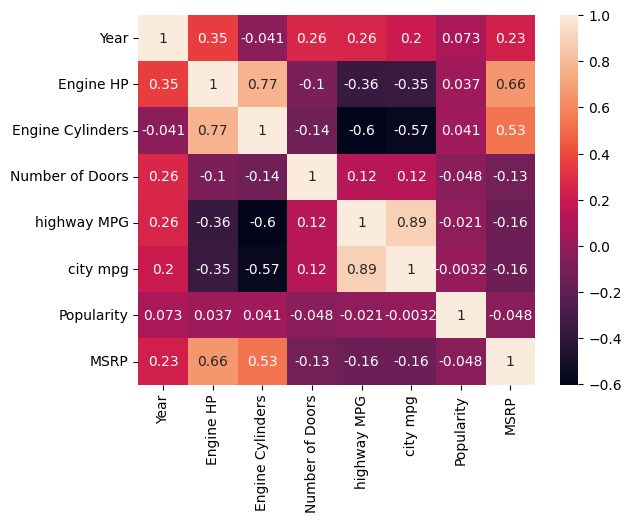

In [96]:
sns.heatmap(corr_matrix,annot=True)

**4. Heatmap**

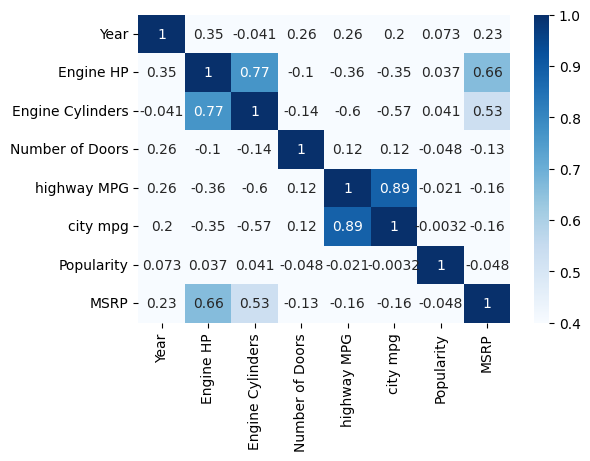

In [121]:
corrmatrix=data.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corrmatrix,vmin=0.4,vmax=1,annot=True,cmap='Blues');

**Linear Regression Model**

In [100]:
#y is the target,x is the feature 
y=data['MSRP']
x=data.drop('MSRP',axis=1)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
#splitting x and y values into training and testing data,test size taken is 25% and random state set to 42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()#creating an instance of LinearRegression()
model=lr.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values using the model created using training data

In [104]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  2092985914.6724951


In [105]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))#MSE value
print('R sqaured value is:',r2_score(y_test,y_pred))#R2 score

MSE is: 2092985914.6724951
R sqaured value is: 0.4497158449659966


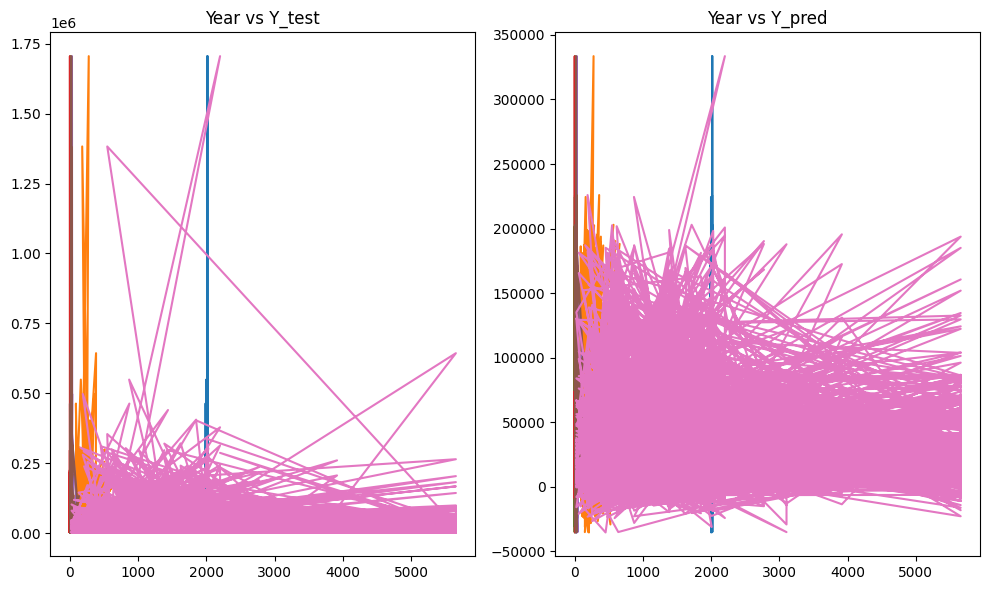

In [106]:
plt.figure(figsize=(10,6))
x1=x_test.sort_values(by='Year')

plt.subplot(1,2,1)
plt.plot(x1,y_test)#plotting Year and Y_test values
plt.title('Year vs Y_test')

plt.subplot(1,2,2)
plt.plot(x1,y_pred);#plotting Year and Y_pred values
plt.title('Year vs Y_pred')

plt.tight_layout()

**Lasso Regression**

It is a Regularization Method to reduce Overfitting.
With Lasso when we increase the value of Lambda(alpha) the most important parameters shrink a little bit and the less important parameters goes closed to zero. So, Lasso is able to exclude silly parameters from the model.

In [107]:
from sklearn.linear_model import Lasso

In [108]:
from sklearn.model_selection import train_test_split

#splitting x and y values into training and testing data,test size taken is 25% and random state set to 42
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

**alpha=0.1**

In [110]:
ls=Lasso(alpha=0.1)
model=ls.fit(x_train,y_train)#creating the model using training data
y_pred=model.predict(x_test)#predicting values

In [111]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R sqaured value is:',r2_score(y_test,y_pred))

MSE is: 2092985010.759637
R sqaured value is: 0.4497160826211666


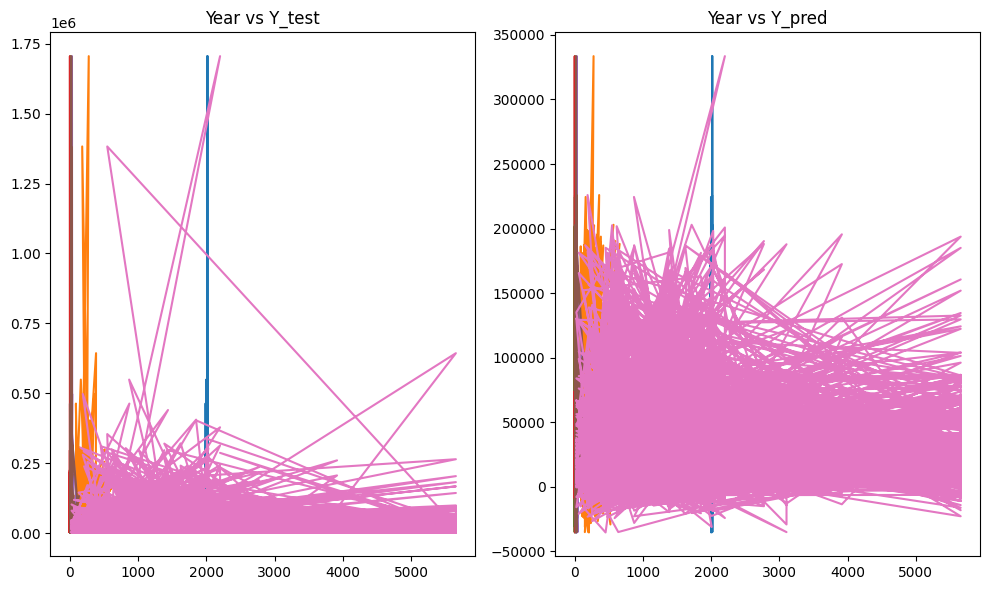

In [112]:
plt.figure(figsize=(10,6))
x1=x_test.sort_values(by='Year')

plt.subplot(1,2,1)
plt.plot(x1,y_test)#plotting Year and Y_test values
plt.title('Year vs Y_test')

plt.subplot(1,2,2)
plt.plot(x1,y_pred);#plotting Year and Y_pred values
plt.title('Year vs Y_pred')

plt.tight_layout()

1. Linear Regression:-
MSE is: 2092985914.6724951
R sqaured value is: 0.4497158449659966

2. Lasso Regression
MSE is: 2092985010.759637
R sqaured value is: 0.4497160826211666